# Kelompok 5 J.A.R.V.I.S
Dataset : HR Analytics

Nama Anggota Kelompok 5 :
1. Fikih Imam R.
2. Mim Hanifah P.
3. Mutia Dewi Kurniasih
4. Nadia Putri P.
5. Rizca Zahra
6. Wilmay Armianty Golden Utomo

## Import Libraries List


In [ ]:
# Put Our Import list
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

##<b>Context and Content</b>

Sebuah perusahaan yang bergerak di bidang Big Data dan Data Science ingin merekrut ilmuwan data dari orang-orang yang berhasil lulus beberapa kursus yang diadakan oleh perusahaan. Banyak orang mendaftar untuk pelatihan perusahaan. Perusahaan ingin mengetahui kandidat mana yang benar-benar ingin bekerja untuk perusahaan setelah pelatihan atau mencari pekerjaan baru karena membantu mengurangi biaya dan waktu serta kualitas pelatihan atau perencanaan kursus dan kategorisasi kandidat. Informasi dari signup dan enrollment pendaftar berupa demografi, pendidikan, dan pengalaman.

Dataset ini dirancang untuk penelitian HR dalam memahami faktor-faktor yang menyebabkan seseorang meninggalkan pekerjaan saat ini. Dengan model yang menggunakan kredensial, demografi, data pengalaman saat ini, dapat diprediksi kemungkinan seorang kandidat untuk mencari pekerjaan baru atau akan bekerja untuk perusahaan, serta menafsirkan faktor-faktor yang memengaruhi keputusan karyawan.

Seluruh data dibagi menjadi data train dan test. Target tidak disertakan dalam data test tetapi data nilai target test ada di file lain. File Sample Submission sesuai dengan enrollee_id dari set tes yang disediakan juga dengan kolom: enrollee _id , target.

<i>Inspiration
- Predict the probability of a candidate will work for the company
- Interpret model(s) such a way that illustrate which features affect candidate decision</i>

## <b>STAGE 1. EDA, INSIGHTS, AND VISUALIZATION</b>

<b><font color='red'>COMMON PITFALLS</b>

Insight yang disajikan <b>tidak memiliki relevansi</b> pada masalah utama,
atau <b>tidak mengaitkan temuan pada sumber lain</b> di luar data</font>

<b>Data Exploration</b>

Dataset sudah di-unduh dan di-explore apa saja attributes-nya dan targetnya output olahan datanya

<b>Exploratory Data Analysis</b>

Untuk setiap feature yang disiapkan sudah dicek distribusinya terhadap variabel target

<b>Insights and visualization</b>

Sudah punya beberapa insight menarik yang diperoleh dari dataset, beserta visualisasi yang mendukung. Insight dikaitkan dengan masalah utama yang ingin diselesaikan

### Get the Dataset + Exploration

In [ ]:
# Code to read csv file into Colaboratory:

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/J.A.R.V.I.S/Colab and Dataset/aug_train.csv')
# test = pd.read_csv('/content/gdrive/MyDrive/aug_test.csv')
# #ss = pd.read_csv('/content/gdrive/MyDrive/sample_submission.csv')

In [ ]:
print('train data :')
display(train)
# print('test data :')
# display(test)
# #print('test answers :')
# #display(ss)

train data :


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


####Features in Given Data set

enrollee_id: Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline : Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Data di sini terkait dengan HR analytics suatu perusahaan, untuk memperkirakan kandidat yang mencari perubahan pekerjaan, dan faktor-faktor yang mempengaruhinya.

Poin kunci utama yang perlu diperhatikan dalam dataset ini:

1. Sebagian besar data bersifat kategoris
2. Handling imbalance data
3. Ada / tidak missing values

#### About Train Data

##### Descriptive Statistics

In [ ]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*80)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*80)
    print(dataframe.info())
    print('*'*80)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*80)
    print(dataframe.describe().T)
    print('*'*80)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*80)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*80)
    print("MISSING VALUES")
    print('*'*80)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*80)
    print("MISSING VALUES IN %")
    print('*'*80)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*80)
    
data_explore(train)

DATA EXPLORATION
********************************************************************************
Shape of dataset :  (19158, 14)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null 

##### Value Counting

Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [ ]:
nums = ['enrollee_id','city_development_index', 'training_hours', 'target']
cats = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(train[col].value_counts())
    print()

Value count kolom city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts            

Kesimpulan tentang train data :

A. Pengamatan info:
1. Data terdiri dari 19158 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris) seperti: `gender` (23.53%), `enrolled_university`(2.01%), `education_level` (2,40%), `major_discipline` (14.68%), `experience` (0.34%), `company_size` (30.99%), `company_type` (32.05%), dan `last_new_job` (2.21%)
3. Sepertinya terdapat kolom yang bisa ditindak lanjut : `experience`, `company_size`, dan `last_new_job`

B. Pengamatan describe:
1. Tidak ada issue pada nilai minimal dan maksimal untuk semua kolom
2. Kolom `city_development_index` tampaknya skew ke kiri (long-left tail)
3. Kolom `training_hours` tampaknya skew ke kanan (long-right tail)
4. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh kaum laki-laki (`gener`), berpengalaman (`relevent_experience`), no enrollment(`enrolled_university`), graduate(`eduction level`), dan STEM(`major_discipline`) 
5. Kolom `city` dan `experience` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (123 dan 22)

#### About Test Data

##### Descriptive Statistics

In [ ]:
# def data_explore(dataframe):
#     print("DATA EXPLORATION")
#     print('*'*80)
#     print("Shape of dataset : ",dataframe.shape)
#     print('*'*80)
#     print(dataframe.info())
#     print('*'*80)
#     print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
#     print('*'*80)
#     print(dataframe.describe().T)
#     print('*'*80)
#     print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
#     print('*'*80)
#     print(dataframe.describe(exclude = ['float', 'int64']).T)
#     print('*'*80)
#     print("MISSING VALUES")
#     print('*'*80)
#     print(dataframe.isna().sum().sort_values(ascending=False))
#     print('*'*80)
#     print("MISSING VALUES IN %")
#     print('*'*80)
#     print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
#     print('*'*80)
    
# data_explore(test)

##### Value Counting

Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [ ]:
# nums = ['enrollee_id','city_development_index', 'training_hours', 'target']
# cats = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
# for col in cats:
#     print(f'''Value count kolom {col}:''')
#     print(test[col].value_counts())
#     print()

Kesimpulan tentang test data:

#### About Test Answers

In [ ]:
# Check info
#ss.info()

In [ ]:
# Check total number of Null Data
#ss.isna().sum()

In [ ]:
# Check describe
# ss.describe()

###Exploratory Data Analysis
Untuk setiap feature yang disiapkan sudah dicek distribusinya terhadap variabel target

#####Univariate Analysis

Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

######Numerical

**Boxplot**

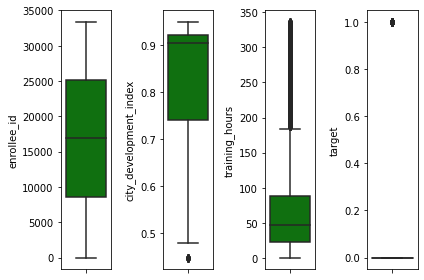

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=train[features[i]], color='green', orient='v')
    plt.tight_layout()

**Pengamatan plot:**

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier yang sangat tipis pada kolom `city_development_index`
* Dari boxplotnya juga tampak mana distribusi yang terlihat *skewed*: `city_development_index` (kiri) dan `training_hours` (kanan)
* Diketahui kolom target bertipe boolean

**Dist Plot**

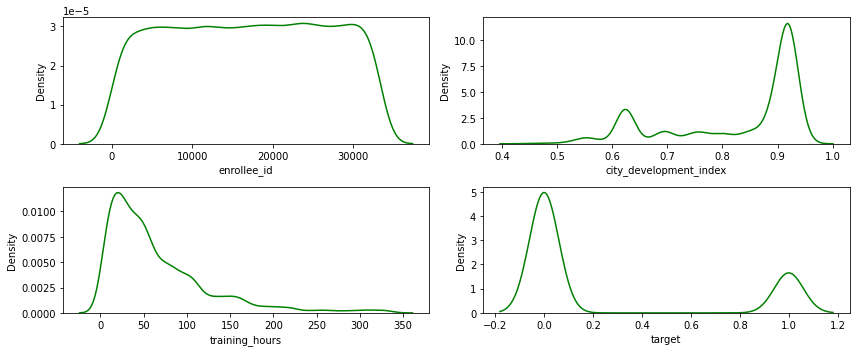

In [ ]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=train[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

**Violin Plots**

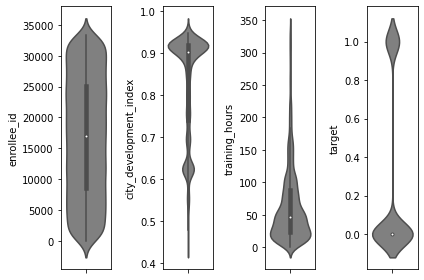

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=train[nums[i]], color='gray', orient='v')
    plt.tight_layout()

**Pengamatan Plot**

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot dan violin di atas, kedua kolom *skewed* (`city_development_index` (skewed kiri) dan `training_hours` (skewed kanan))
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kedua kolom tersebut nantinya

######Categorical

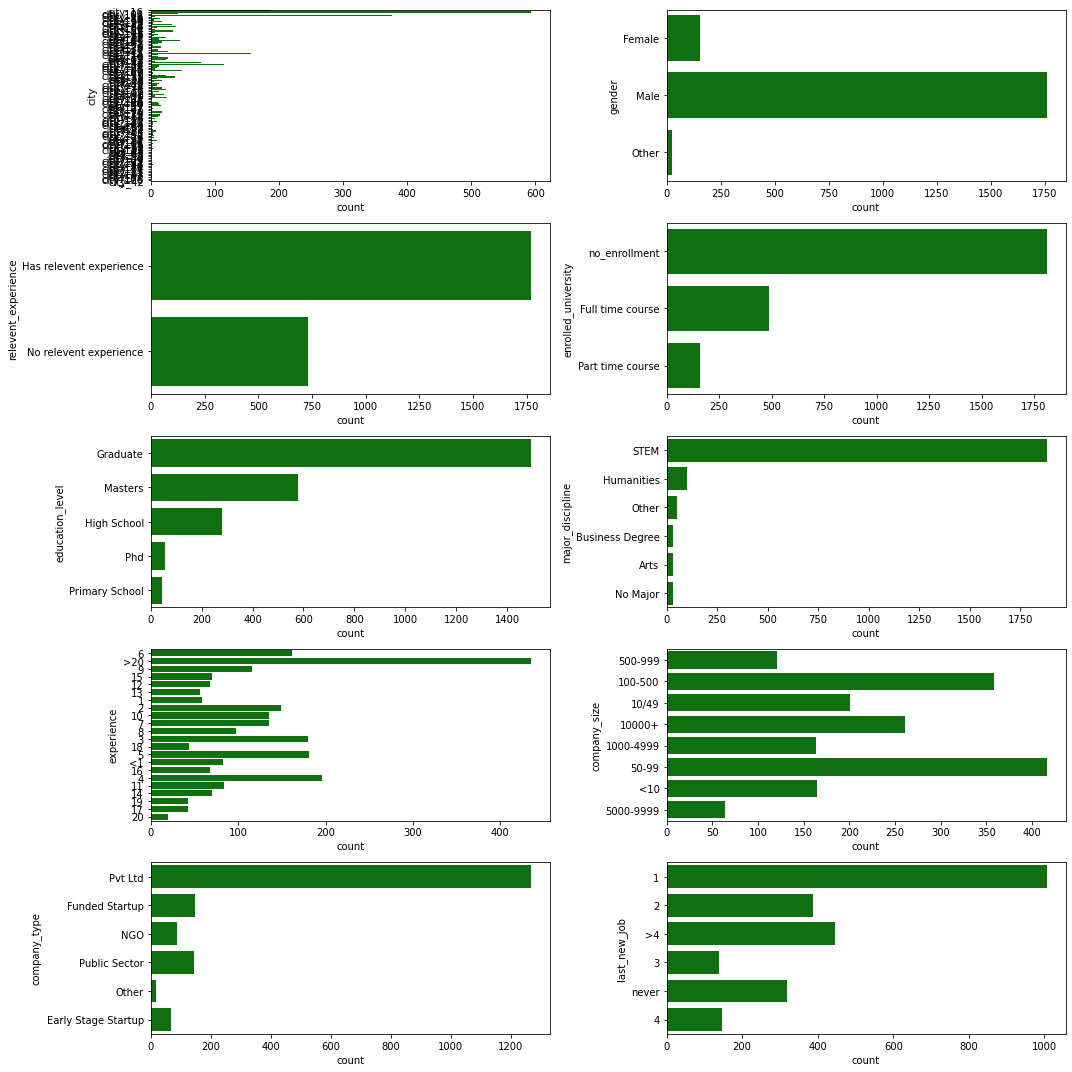

In [ ]:
train_sample = train.sample(2500, random_state=42)
plt.figure(figsize=(15,15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y = train_sample[cats[i]], color='green', orient='v')
    plt.tight_layout()

**Hasil Pengamatan:**

1. kolom (`enrollee_id`) merupakan primary keys sehingga distribusi plot sangat luas dan dapat kita lakukan drop untuk kolom ini <br>
2. kolom (`target`) merupakan data boelan dan imbalance <br>
3. Kandidat didominasi oleh Male (`Gender`), STEM (`major_dicipline`) dan Pvt Ltd (`company_size`) <br>
4. kolom (`city_development_index`) memiliki distribusi yang skew ke kiri sedangkan kolom (`training_hours`) memiliki distribusi skew yang extrem ke kanan

#### Multivariate Analysis

##### Numerical

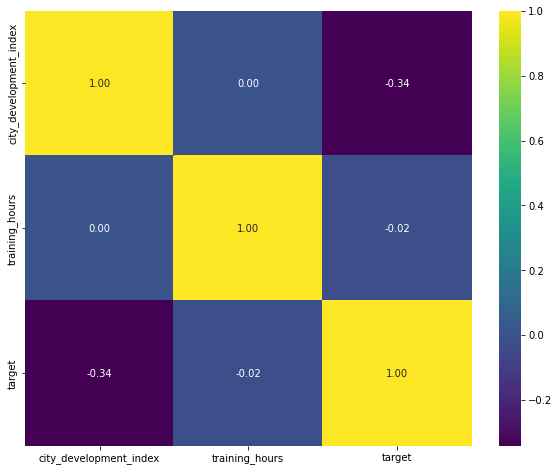

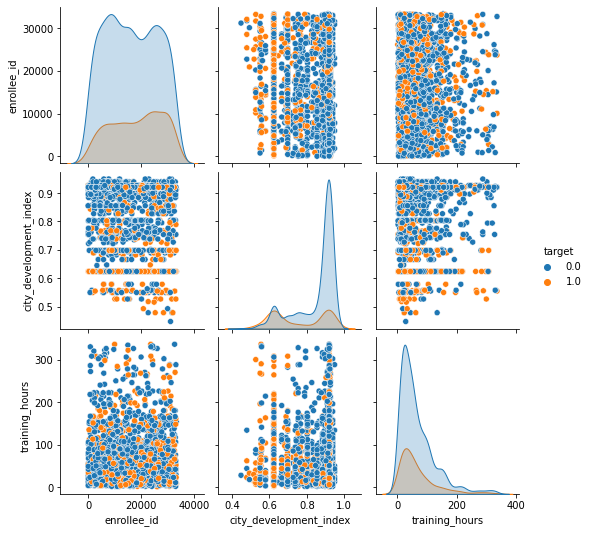

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.drop('enrollee_id', axis=1).corr(), cmap='viridis', annot=True, fmt='.2f')
sns.pairplot(train_sample, diag_kind ='kde', hue='target');

**Hasil Pengamatan**

1. Berdasarkan heatmap plot, `trainning hours` tidak memiliki impact yang sangat signifikan terhadap target <br>
2. `City_development_index` berkorelasi negatif terhadap nilai targetnya dan memiliki nilai korelasi lemah dengan target <br>
3. Dari pairplot, terlihat bahwa persebaran target yang searching for new job cukup merata

**1. Bagaimana pengaruh City Development Index ketika seseorang memutuskan mencari pekerjaan baru?**

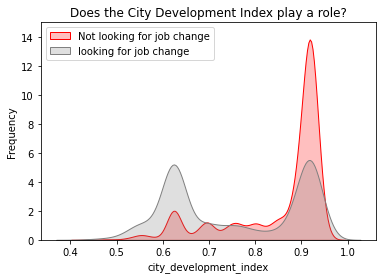

In [ ]:
g = sns.kdeplot(train['city_development_index'][(train["target"] == 0) & (train['city_development_index'].notnull())], color="Red", shade = True)
g = sns.kdeplot(train['city_development_index'][(train["target"] == 1) & (train['city_development_index'].notnull())], ax =g, color="Grey", shade= True)
g.set_xlabel('city_development_index')
g.set_ylabel("Frequency")
g.set_title('Does the City Development Index play a role?')
plt.ylim(0, 15)
g = g.legend(["Not looking for job change","looking for job change"], loc='upper left')

Pengamatan :
1. Kandidat dengan CDI rendah (0,66) cenderung memiliki keinginan untuk mencari pekerjaan baru
2. Kandidat dengan CDI tinggi (0.9) cenderung sangat tidak tertarik mencari pekerjaan baru.

**2. Bagaimana pengaruh Training Hours dengan keinginan seseorang untuk mencari pekerjaan baru?**

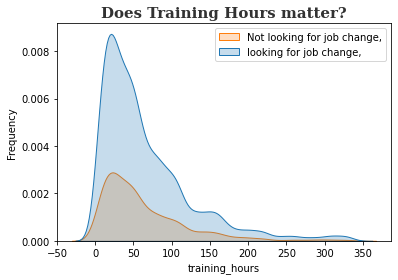

In [ ]:
g = sns.kdeplot(train['training_hours'], hue='target',data=train, color="Red", shade = True)
g.set_xlabel('training_hours')
g.set_ylabel("Frequency")
g.legend(["Not looking for job change,","looking for job change,"])
g.set_title('Does Training Hours matter?', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232");

Pengamatan :
1. Kandidat dengan training hours kurang lebih 20 jam memiliki kecenderungan untuk mencari pekerjaan baru
2. Dapat dilihat jumlah waktu course yang diikuti kandidat adalah sekitar 46-48 jam.
3. Semakin banyak jumlah training hours maka semakin sedikit kecenderungan untuk mencari pekerjaan baru 

##### Categorical

[10209, 912, 141]
[3012, 326, 50]


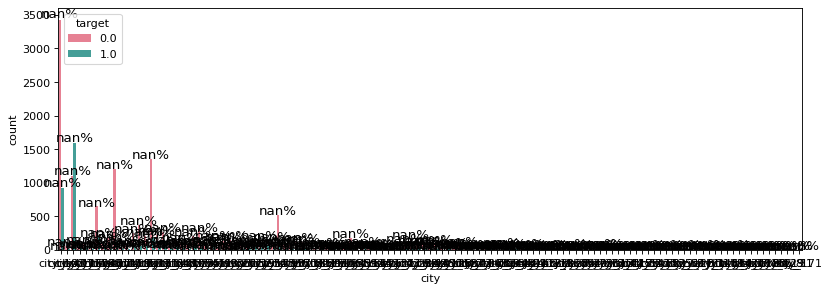

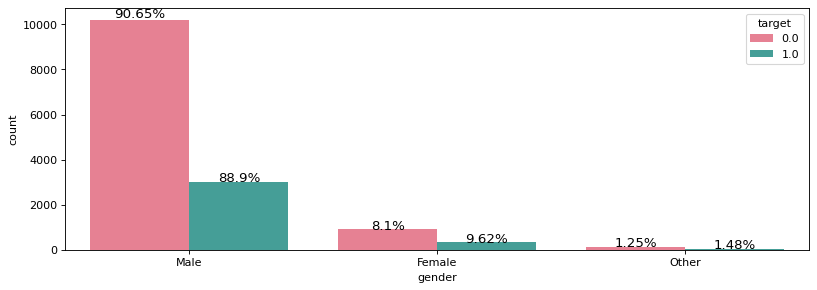

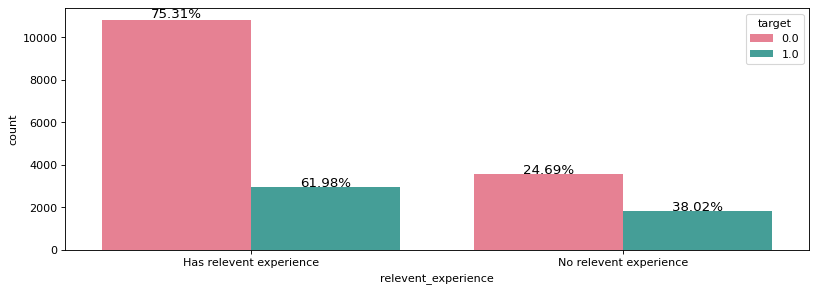

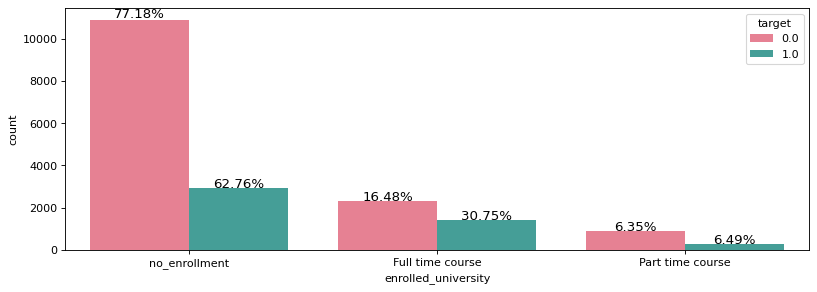

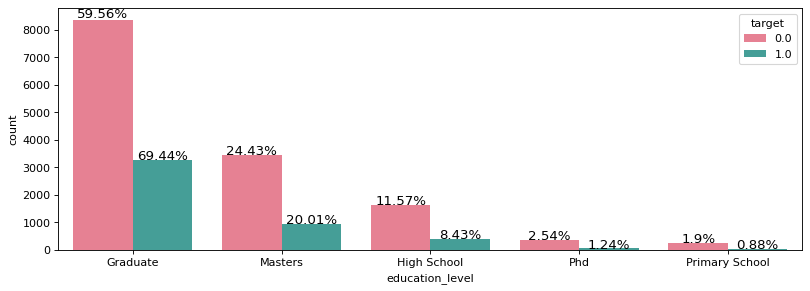

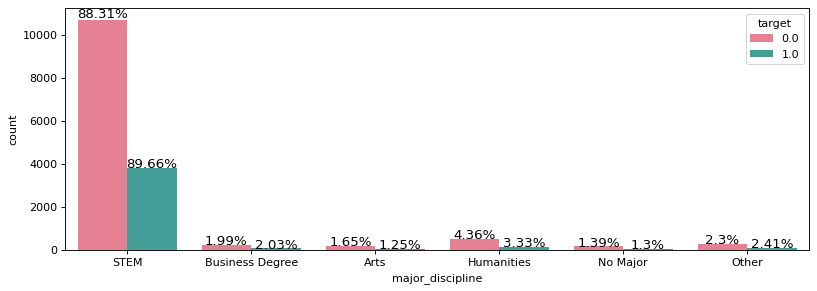

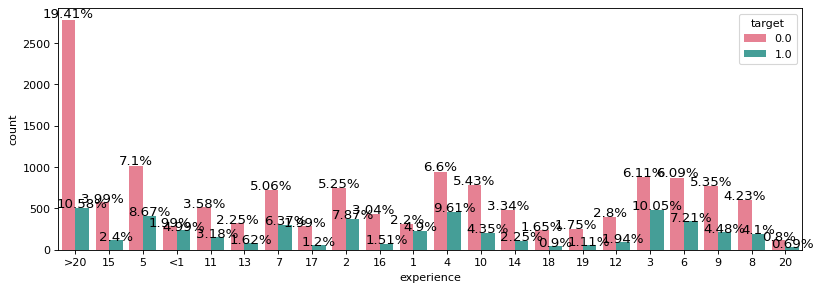

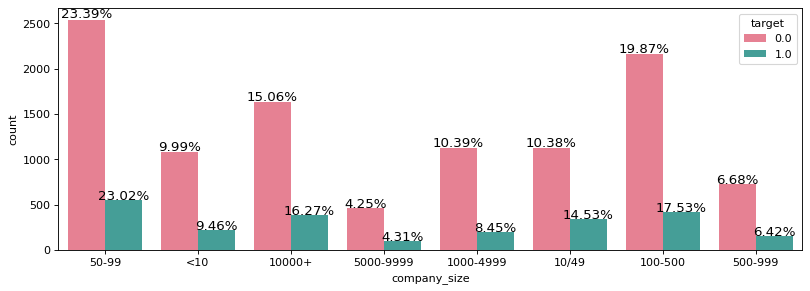

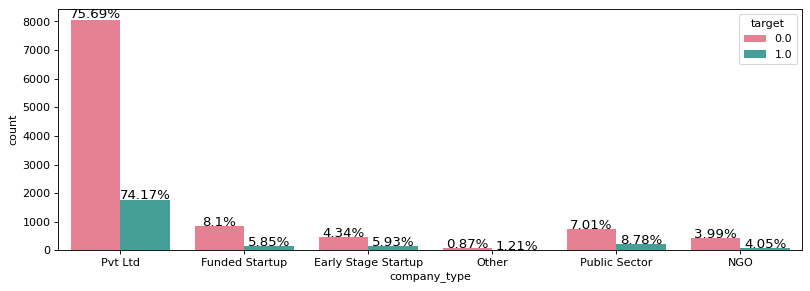

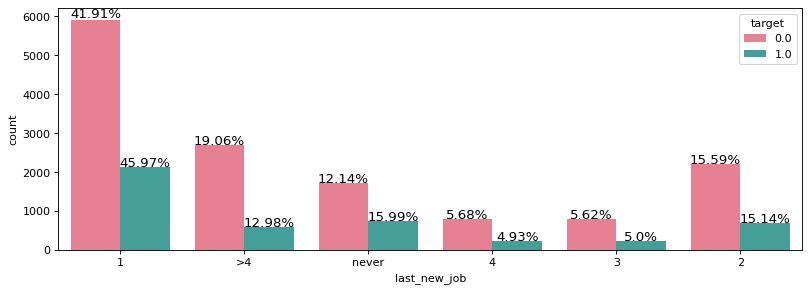

In [ ]:
values = {}
lists =[]
for col in cats:
    plt.figure(figsize=(12,4), dpi=80)
    ax = sns.countplot(data=train,x=col, palette='husl',hue = 'target')
    a = list()
    b = list()
    numbers = 0
    n = len(ax.patches)
    for p in ax.patches:
        if numbers < n/2: a.append(p.get_height())
        else: b.append(p.get_height())
        numbers += 1
    if col == 'gender':
        print(a)
        print(b)
    a = sum(a)
    b = sum(b)
    numbers = 0
    for p in ax.patches:
        if numbers < n/2: h = round(100*p.get_height()/a,2)
        else: h = round(100*p.get_height()/b,2)
        height=str(h)+'%'
        ax.annotate(height, (p.get_x()+p.get_width()/2, p.get_height()*1.01), ha='center', fontsize= 12)
        lists.append(p.get_height())
        numbers += 1
    values[col]=lists
    lists=[]

**Kesimpulan:**

Dari hasil multivariate analysis, terlihat bahwa presentase yang tidak mencari pekerjaan (target=0) lebih banyak dibandingkan dengan yang mencari pekerjaan (target=1) disetiap featurenya

###Insights and Visualization
Sudah punya beberapa insight menarik yang diperoleh dari dataset, beserta visualisasi yang mendukung. 

Insight dikaitkan dengan masalah utama yang ingin diselesaikan

Dari EDA di atas, didapatkan beberapa bussiness insight :

1. City Development Index : 
      1. Kandidat dengan CDI rendah (0,66) cenderung memiliki keinginan untuk mencari pekerjaan baru
      2. Kandidat dengan CDI tinggi (0.9) cenderung sangat tidak tertarik mencari pekerjaan baru.


2. Training Hours :
     1. Kandidat dengan training hours kurang lebih 20 jam memiliki kecenderungan untuk mencari pekerjaan baru
     2. Dapat dilihat jumlah waktu course yang diikuti kandidat adalah sekitar 46-48 jam.
     3. Semakin banyak jumlah training hours maka semakin sedikit kecenderungan untuk mencari pekerjaan baru 
      
      
3. Gender :
      1. 88.9% kandidat laki-laki cenderung mencari pekerjaan baru.
      2. Hanya 9.62% kandidat perempuan yang cenderung akan mencari pekerjaan baru.


4. Company Type : 
      * Kandidat dari Company Type Pvt Ltd paling banyak ingin mencari pekerjaan baru, yaitu sebesar 74.17%.


5. Education Level :
      * Kandidat dengan education level graduate paling banyak mencari pekerjaan baru yaitu sebesar 69.44%   


6. Major Discipline :
      * Kandidat dengan Major discipline STEM (Science Technology Engineering Math) paling banyak mencari pekerjaan baru yaitu sebesar 89.66%.


7. Relevant Experience :
      1. 61.98% kandidat dengan relevant experience cenderung akan mencari pekerjaan baru. 
      2. 38.02% kandidat dengan non-relevant experience cenderung akan mencari pekerjaan baru.

 
8. Experience - kandidat yang cenderung akan mencari pekerjaan baru adalah kandidat dengan total experience:
      1. Di atas 20 tahun experience (10.58%)
      2. 3 tahun experience(9.61%)
      3. 4 tahun experience(10.05%)


9. Last New Job :
    * Kandidat yang memiliki perbedaan 1 tahun antara pekerjaan lama dan pekerjaannya sekarang cenderung akan mencari pekerjaan baru (45.97%)

##<B>STAGE 2. DATA PREPROCESSING</B>
<b><font color='red'>COMMON PITFALLS</b>

<b>Memanipulasi data tanpa alasan</b> yang jelas, misalnya melakukan penambahan feature baru tapi tidak ada alasan yang mendasari mengapa langkah tersebut diperlukan</font>

<b>Data Cleansing</b>

Sudah melakukan pengecekan data
bermasalah (missing values, invalid values,
data duplicates), dan sudah
membersihkannya

<b>Feature Engineering</b>

Sudah menentukan feature apa saja yang
akan digunakan, feature apa yang perlu
ditambahkan, dan reformatting feature
sesuai kebutuhan


### Data Cleansing
Sudah melakukan pengecekan data
bermasalah (missing values, invalid values,
data duplicates), dan sudah
membersihkannya.

<font color = 'orange'>(nanti kalo bisa disediain EDA dari data yang sudah dibersihkan dan siap pakai dan dibandingkan dengan data sebelum cleansing agar terlihat perbedaannya)

#### Feature Encoding

In [ ]:
# Copy dataframe train
df = train.copy()

# Pendekatan untuk handle missing values pada fitur categorical dengan mengubahnya menjadi numerical menggunakan label encoder

# Buat dictionaries of features
gender_map = {
        'Female': 2,
        'Male'  : 1,
        'Other' : 0
         }

relevent_experience_map = {
    'Has relevent experience' :  1,
    'No relevent experience'  :  0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':  1, 
    'Part time course':  2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 

company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

# Transforming categorical features into numerical features
df.loc[:,'gender'] = df['gender'].map(gender_map)
df.loc[:,'relevent_experience'] = df['relevent_experience'].map(relevent_experience_map)
df.loc[:,'enrolled_university'] = df['enrolled_university'].map(enrolled_university_map)
df.loc[:,'education_level'] = df['education_level'].map(education_level_map)
df.loc[:,'experience'] = df['experience'].map(experience_map)
df.loc[:,'company_size'] = df['company_size'].map(company_size_map)
df.loc[:,'company_type'] = df['company_type'].map(company_type_map)
df.loc[:,'last_new_job'] = df['last_new_job'].map(last_new_job_map)

# Label encoder city karena city memiliki kardinalitas tinggi
lb_en = LabelEncoder()

df.loc[:,'city'] = lb_en.fit_transform(df.loc[:,'city'])

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1.0,1,0.0,2.0,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,77,0.776,1.0,0,0.0,2.0,STEM,15.0,5.0,0.0,5.0,47,0.0
2,11561,64,0.624,NaN,0,1.0,2.0,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,14,0.789,NaN,0,NaN,2.0,Business Degree,0.0,NaN,0.0,0.0,52,1.0
4,666,50,0.767,1.0,1,0.0,3.0,STEM,21.0,5.0,1.0,4.0,8,0.0


In [ ]:
# One hot encoding major discipline
for cat in ['major_discipline']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

# Drop kolom major_discipline karena sudah di encoding
df = df.drop(columns=['major_discipline'])
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,8949,5,0.920,1.0,1,0.0,2.0,21.0,NaN,NaN,1.0,36,1.0,0,0,0,0,0,1
1,29725,77,0.776,1.0,0,0.0,2.0,15.0,5.0,0.0,5.0,47,0.0,0,0,0,0,0,1
2,11561,64,0.624,NaN,0,1.0,2.0,5.0,NaN,NaN,0.0,83,0.0,0,0,0,0,0,1
3,33241,14,0.789,NaN,0,NaN,2.0,0.0,NaN,0.0,0.0,52,1.0,0,1,0,0,0,0
4,666,50,0.767,1.0,1,0.0,3.0,21.0,5.0,1.0,4.0,8,0.0,0,0,0,0,0,1


#### Handling Missing Values
handle missing values in the dataset:
- Deleting Rows with missing values
> Pros:<br>
A model trained with the removal of all missing values creates a robust model.<br>
Cons:<br>
Loss of a lot of information.
Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.
- Impute missing values for continuous variable (Mean/Median)
> Pros:<BR>
Prevent data loss which results in deletion of rows or columns.
Works well with a small dataset and is easy to implement.<Br>
Cons:<Br>
Works only with numerical continuous variables.
Can cause data leakage.
Do not factor the covariance between features.<br>
- Impute missing values for categorical variable (Modus)
> Pros:<Br>
Prevent data loss which results in deletion of rows or columns.
Works well with a small dataset and is easy to implement.
Negates the loss of data by adding a unique category<Br>
Cons:<Br>
Works only with categorical variables.
Addition of new features to the model while encoding, which may result in poor performance<br>
- Other Imputation Methods
> LOCF, BOCF, LRCF dan NOCB
- Using Algorithms that support missing values (The k-NN algorithm, Naive Bayes, RandomForest)
> Pros:<br>
No need to handle missing values in each column as ML algorithms will handle them efficiently.<Br>
Cons:<Br>
No implementation of these ML algorithms in the scikit-learn library.<br>
- Prediction of missing values
> Pros:<br>
Gives a better result than earlier methods
Takes into account the covariance between the missing value column and other columns.<Br>
Cons:<Br>
Considered only as a proxy for the true values
- Imputation using Deep Learning Library — Datawig
> Pros:<br>
Quite accurate compared to other methods.
It supports CPUs and GPUs.<Br>
Cons:<Br>
Can be quite slow with large datasets.

source : https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e <Br>
http://onbiostatistics.blogspot.com/2021/01/single-imputation-methods-for-missing.html

********************************************************************************
MISSING VALUES
********************************************************************************
company_type                        6140
company_size                        5938
gender                              4508
education_level                      460
last_new_job                         423
enrolled_university                  386
experience                            65
major_discipline_Arts                  0
major_discipline_Other                 0
major_discipline_No Major              0
major_discipline_Humanities            0
major_discipline_Business Degree       0
enrollee_id                            0
target                                 0
training_hours                         0
city                                   0
relevent_experience                    0
city_development_index                 0
major_discipline_STEM                  0
dtype: int64


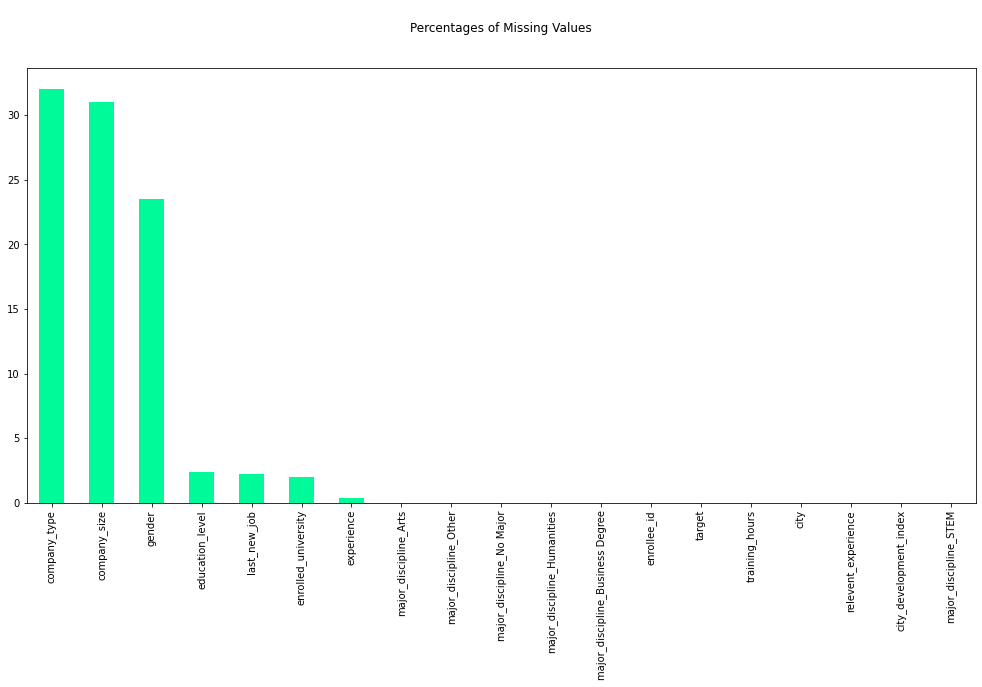

In [ ]:
print('*'*80)
print("MISSING VALUES")
print('*'*80)
print(df.isna().sum().sort_values(ascending=False))

missing = 100 * df.isna().sum().sort_values(ascending=False) / df.shape[0]
missing.plot(kind='bar', color="mediumspringgreen", figsize=(17,8))
plt.title("\nPercentages of Missing Values\n\n")
plt.show()

In [ ]:
# Jangan lupa drop enrollment_id, lalu diisi dengan mice iterative imputer
df = df.drop(columns=['enrollee_id'])

lr = LinearRegression()
mice_imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10, n_nearest_features=2, 
                                imputation_order = 'roman')
final_df = mice_imputer.fit_transform(df)

final_df = pd.DataFrame(final_df)
final_df.columns = ['city', 'city_development_index',	'gender',	'relevent_experience', 'enrolled_university',
                    'education_level',	'experience',	'company_size',	'company_type',	'last_new_job',
                    'training_hours',	'target',	'major_discipline_Arts',	'major_discipline_Business Degree',
                    'major_discipline_Humanities', 'major_discipline_No Major', 'major_discipline_Other', 'major_discipline_STEM']

final_df = pd.DataFrame(final_df)                                                   
display(final_df)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,5.0,0.920,1.000000,1.0,0.000000,2.0,21.0,3.387606,0.765420,1.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,77.0,0.776,1.000000,0.0,0.000000,2.0,15.0,5.000000,0.000000,5.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,64.0,0.624,1.073491,0.0,1.000000,2.0,5.0,3.159454,0.582996,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.0,0.789,1.083084,0.0,0.312741,2.0,0.0,3.020743,0.000000,0.0,52.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,50.0,0.767,1.000000,1.0,0.000000,3.0,21.0,5.000000,1.000000,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55.0,0.878,1.000000,0.0,0.000000,2.0,14.0,3.089342,0.696554,1.0,42.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
19154,5.0,0.920,1.000000,1.0,0.000000,2.0,14.0,3.387606,0.765420,4.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19155,5.0,0.920,1.000000,1.0,0.000000,2.0,21.0,5.000000,0.000000,4.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19156,94.0,0.802,1.000000,1.0,0.000000,1.0,0.0,6.000000,0.000000,2.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Lanjut di check kembali ada missing values atau tidak

def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(final_df)

,Count Missing,Percent Missing
city,0,0.0
city_development_index,0,0.0
gender,0,0.0
relevent_experience,0,0.0
enrolled_university,0,0.0
education_level,0,0.0
experience,0,0.0
company_size,0,0.0
company_type,0,0.0
last_new_job,0,0.0


#### Handling Duplicated Data

In [ ]:
# Drop duplicated rows
print(f'Jumlah row duplicated sebelum dihapus: {final_df.duplicated().sum()}')
final_df.drop_duplicates(inplace=True)
print(f'Jumlah row duplicated SETELAH dihapus: {final_df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus: 49
Jumlah row duplicated SETELAH dihapus: 0


####  Handling Outliers

1. Outlier Detection Technique :
  * Z-score
  * I.Q.R method
  * Visualizing the data

2. Dealing with Ouliers:
  * Imputation

**1. Outlier Detection Technique**

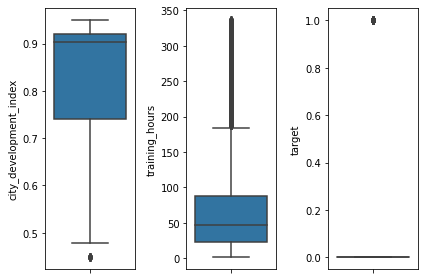

In [ ]:
# 1. Visualizing the data

# Box and whisker plot (box plot)
nums_remove = ['enrollee_id']
nums_temps = list(set(nums) - set(nums_remove))

features = nums_temps
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=final_df[features[i]], orient='v')
    plt.tight_layout()

In [ ]:
# 2. Z-score to dectect training_hours outlier
out=[]
def Zscore_outlier(final_df):
    m = np.mean(final_df)
    sd = np.std(final_df)
    for i in final_df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['training_hours'])

Outliers: [332, 260, 290, 326, 246, 262, 320, 302, 288, 306, 322, 314, 280, 256, 326, 326, 290, 292, 326, 314, 256, 276, 316, 304, 284, 278, 284, 332, 310, 250, 246, 258, 330, 326, 314, 312, 310, 262, 328, 300, 280, 336, 308, 298, 316, 292, 316, 254, 258, 332, 248, 320, 260, 320, 276, 280, 316, 328, 254, 246, 246, 278, 264, 308, 328, 262, 312, 248, 292, 308, 302, 298, 332, 314, 334, 324, 334, 332, 258, 264, 300, 314, 328, 256, 246, 266, 282, 314, 298, 316, 290, 304, 276, 288, 300, 268, 256, 276, 320, 262, 326, 282, 336, 300, 266, 248, 336, 312, 258, 290, 272, 288, 300, 336, 264, 308, 300, 280, 282, 278, 258, 320, 330, 278, 320, 326, 266, 246, 256, 302, 294, 272, 310, 290, 328, 260, 334, 328, 322, 288, 324, 256, 306, 258, 282, 268, 306, 334, 260, 336, 314, 250, 314, 268, 298, 332, 298, 268, 246, 322, 264, 300, 320, 280, 294, 288, 284, 306, 336, 258, 258, 304, 306, 326, 270, 312, 330, 292, 330, 264, 290, 248, 322, 292, 256, 306, 276, 304, 250, 286, 288, 312, 264, 264, 322, 258, 322, 250,

In [ ]:
# 3. iqr to detect city_development_index outlier
out=[]
def iqr_outliers(final_df):
    q1 = final_df.quantile(0.25)
    q3 = final_df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in final_df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(final_df['city_development_index'])

Outliers: [0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999, 0.4479999999999999]


**2. Dealing with Oulier with Median Imputation**
* Berdasarkan penelitian Naresh Bhat, 2021. Diantara 4 metode treat outlier yang dilakukan, median imputation memberikan hasil handling outlier terbaik. 

* Dengan metode imputing outliers ini, kita tidak akan kehilangan data. Median imputation merupakan metode yang paling sesuai karena tidak terpengaruh oleh outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


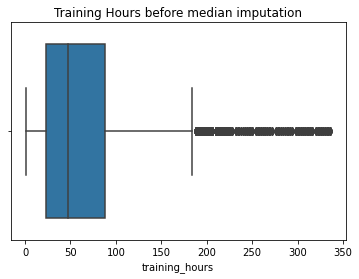

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


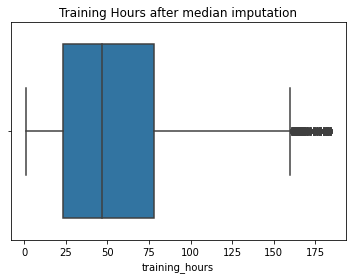

In [ ]:
# Median imputation for training_hours
sns.boxplot(final_df['training_hours'])
plt.title("Training Hours before median imputation")
plt.show()
q1 = final_df['training_hours'].quantile(0.25)
q3 = final_df['training_hours'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(final_df['training_hours'])
for i in final_df['training_hours']:
    if i > Upper_tail or i < Lower_tail:
            final_df['training_hours'] = final_df['training_hours'].replace(i, med)
sns.boxplot(final_df['training_hours'])
plt.title("Training Hours after median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


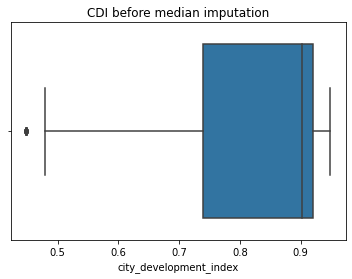

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


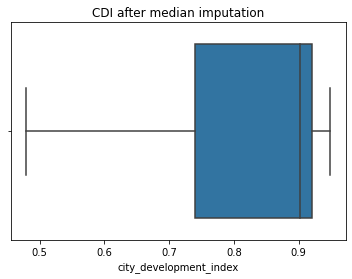

In [ ]:
# Median imputation for city_development_index
sns.boxplot(final_df['city_development_index'])
plt.title("CDI before median imputation")
plt.show();
q1 = final_df['city_development_index'].quantile(0.25)
q3 = final_df['city_development_index'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(final_df['city_development_index'])
for i in final_df['city_development_index']:
    if i > Upper_tail or i < Lower_tail:
            final_df['city_development_index'] = final_df['city_development_index'].replace(i, med)
sns.boxplot(final_df['city_development_index'])
plt.title("CDI after median imputation")
plt.show();

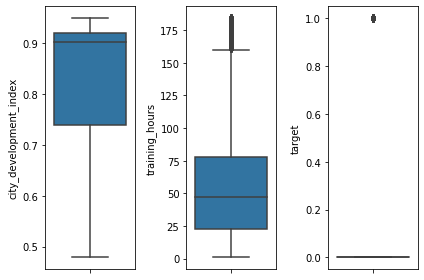

In [ ]:
# After imputation
features = nums_temps
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=final_df[features[i]], orient='v')
    plt.tight_layout()

####Feature Transformation

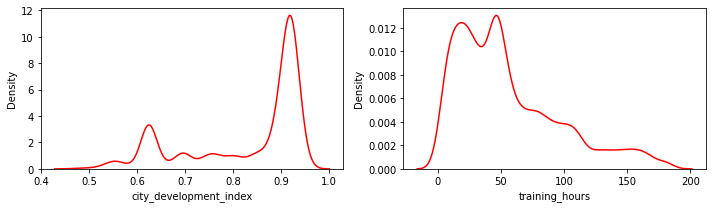

In [ ]:
# Distribusi plot numerical (nilai asli)
nums=['city_development_index','training_hours']
plt.figure(figsize=(10, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(x=final_df[nums[i]], color='red')
    plt.xlabel(nums[i])
    plt.tight_layout()

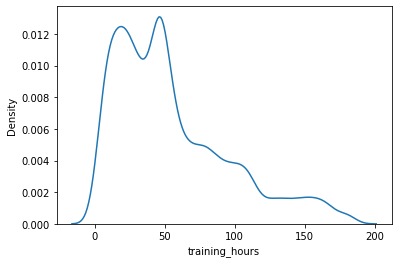

In [ ]:
# Feature training_hours memiliki distribusi right-skewed, oleh karena itu perlu dilakukan Log Transformation

# Distribusi training_hours (nilai asli)
sns.kdeplot(final_df['training_hours'])

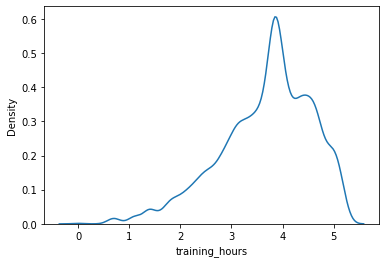

In [ ]:
# Distribusi training_hours bila di log transformasi
sns.kdeplot(np.log(final_df['training_hours']));
# lebih mendekati distribusi normal

In [ ]:
# Kita log tranformasi feature training hours
final_df['log_training_hours'] = np.log(final_df['training_hours'])

# Feature city_development_index dan log_training_hours dilakukan Standardization (karena distribusi datanya sudah mendekati normal)
final_df['city_development_index_std'] = StandardScaler().fit_transform(final_df['city_development_index'].values.reshape(len(final_df), 1))
final_df['training_hours_std'] = StandardScaler().fit_transform(final_df['log_training_hours'].values.reshape(len(final_df), 1))

# Karena hasilnya minus, kita lakukan scaling dengan menggunakan Normalisasi
final_df['city_development_index_norm'] = MinMaxScaler().fit_transform((final_df['city_development_index_std']).values.reshape(len(final_df), 1))
final_df['training_hours_norm'] = MinMaxScaler().fit_transform((final_df['training_hours_std']).values.reshape(len(final_df), 1))

Didapatkan plot distribusi untuk City Development Index setelah transfomasi, seperti berikut:
 


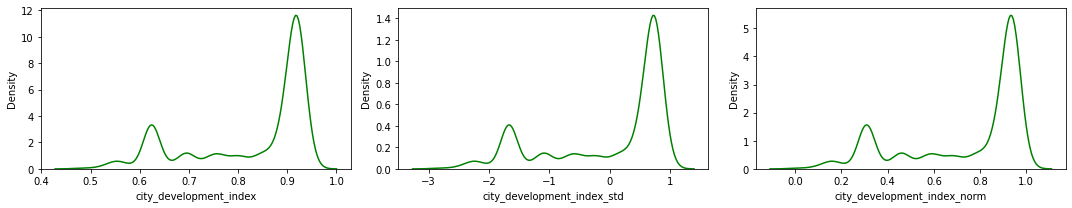

In [ ]:
plt.figure(figsize=(15,3))
dist_cdi=['city_development_index','city_development_index_std', 'city_development_index_norm']
for i in range(0, len(dist_cdi)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(x=final_df[dist_cdi[i]], color='green')
    plt.xlabel(dist_cdi[i])
    plt.tight_layout()

print('Didapatkan plot distribusi untuk City Development Index setelah transfomasi, seperti berikut:')
print(' ')

Didapatkan plot distribusi untuk Training Hours setelah transfomasi, seperti berikut:
 


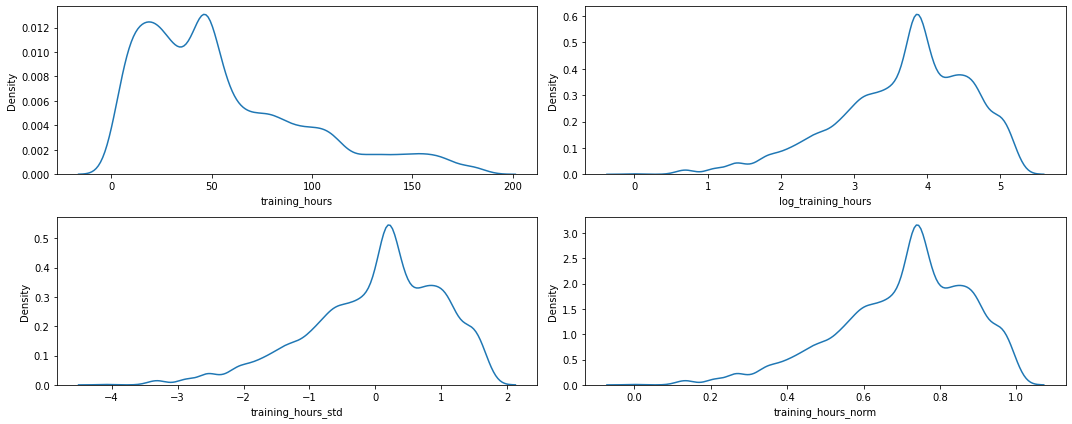

In [ ]:
plt.figure(figsize=(15,6))
dist_TH=['training_hours', 'log_training_hours', 'training_hours_std', 'training_hours_norm']
for i in range(0, len(dist_TH)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=final_df[dist_TH[i]])
    plt.xlabel(dist_TH[i])
    plt.tight_layout()

print('Didapatkan plot distribusi untuk Training Hours setelah transfomasi, seperti berikut:')
print(' ')

#### Feature Selection

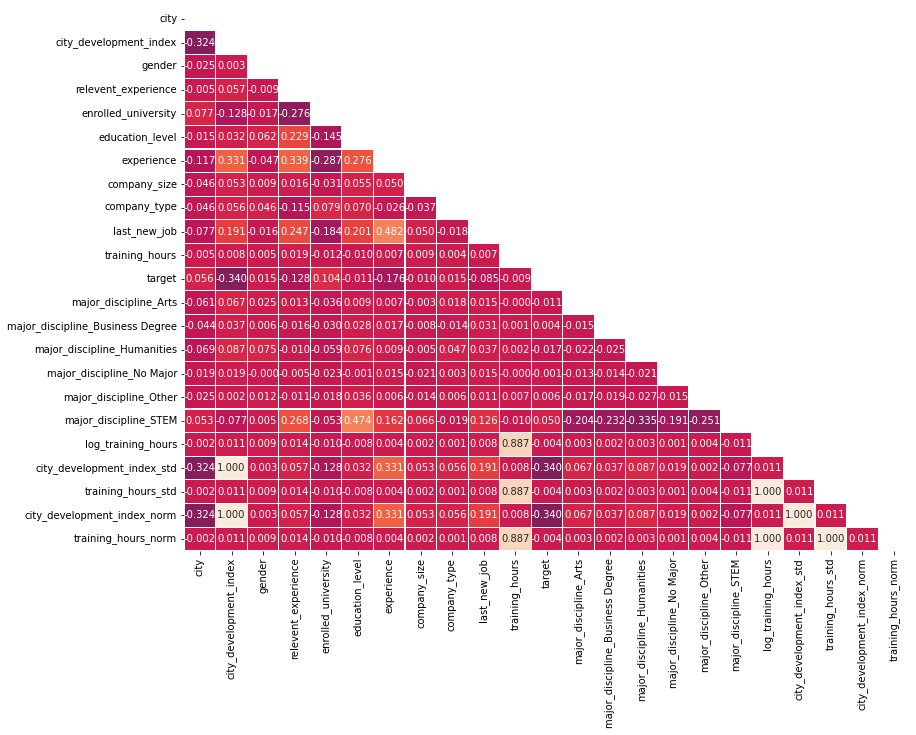

In [ ]:
# Coba lihat korelasi antara data yang belum di transform dan sesudah di transformasi, jadi nama dataframe sebelum di imbalance yaa..

matrix = np.triu(final_df.corr())
plt.figure(figsize=(13, 10))
sns.heatmap(final_df.corr(), annot = True, fmt=".3f", mask = matrix,
            vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False)
plt.show()

# STAGE 3. MACHINE LEARNING MODELLING AND EVALUATION

#### Handling Imbalance


In [ ]:
X = final_df
y = final_df['target']

In [ ]:
y.value_counts()

0.0    14344
1.0     4765
Name: target, dtype: int64

In [ ]:
#split lalu smote
X = final_df.drop('target', axis=1)
y = final_df['target']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_Test = train_test_split(X,y,test_size=0.4,random_state=42,shuffle=True, stratify=y)
print("X TRAIN SHAPE: ",X_train.shape)
print("X TEST SHAPE: ",X_test.shape)
print("Y TRAIN SHAPE: ",Y_train.shape)
print("Y TEST SHAPE: ",Y_Test.shape)

from imblearn.over_sampling import SVMSMOTE
svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_Train, Y_Train = svm_smote.fit_resample(X_train,Y_train)

print('After SMOTE')
print("X TRAIN SHAPE: ",X_Train.shape)
print("X TEST SHAPE: ",X_Test.shape)
print("Y TRAIN SHAPE: ",Y_Train.shape)
print("Y TEST SHAPE: ",Y_Test.shape)

X TRAIN SHAPE:  (11465, 22)
X TEST SHAPE:  (7644, 22)
Y TRAIN SHAPE:  (11465,)
Y TEST SHAPE:  (7644,)
After SMOTE
X TRAIN SHAPE:  (17212, 22)
X TEST SHAPE:  (7644, 22)
Y TRAIN SHAPE:  (17212,)
Y TEST SHAPE:  (7644,)


In [ ]:
print("TRAIN:",X_train.index, "\nTEST:",X_Test.index)

TRAIN: Int64Index([ 9078,  8139, 17490,  9335, 13500,  4734,  1426, 16660, 16116,
            14023,
            ...
             4377,  5698, 10375,  5654,  1037,  4743, 13444,  2385,  1553,
            14079],
           dtype='int64', length=11465) 
TEST: Int64Index([11320, 12865, 17872,   759, 11444,  3495,  9297,  5719,  8239,
            17845,
            ...
            11596, 11729, 12395, 14463,  7931, 15616,  6947, 18923, 11202,
            14646],
           dtype='int64', length=7644)


Int64Index([ 9078,  8139, 17490,  9335, 13500,  4734,  1426, 16660, 16116,
            14023,
            ...
             4377,  5698, 10375,  5654,  1037,  4743, 13444,  2385,  1553,
            14079],
           dtype='int64', length=11465)

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#evaluation metrics for classification
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, plot_confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### Modeling 
1. Build Base Model
2. Hyperparameter Tuning with Evaluation Metrics
3. Hyperparameter Tuning Result
4. Feature Importances
5. Feature Selection and Remodelling

In [ ]:
# standardscaler
sc = StandardScaler()
X_train = sc.fit_transform(X_Train)
X_test = sc.transform(X_Test)
y_train = Y_Train
y_test = Y_Test

In [ ]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (17212, 22)
X_test (7644, 22)
y_train (17212,)
y_test (7644,)


In [ ]:
y_test.value_counts()

0.0    5738
1.0    1906
Name: target, dtype: int64

#### 1. Build Base Model

In [ ]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
m={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
m={'Model Algorithms':model_names,'Accuracy':acc}
m

{'Accuracy': [0.728806907378336,
  0.7309000523286238,
  0.7660910518053375,
  0.7074829931972789,
  0.7884615384615384,
  0.7148090005232862,
  0.7951334379905809,
  0.7203035060177917],
 'Model Algorithms': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB']}

In [ ]:
acc_df=pd.DataFrame(m)
acc_df

,Model Algorithms,Accuracy
0,LogisticRegression,0.728807
1,LinearSVM,0.730900
2,rbfSVM,0.766091
3,KNearestNeighbors,0.707483
4,RandomForestClassifier,0.788462
5,DecisionTree,0.714809
6,GradientBoostingClassifier,0.795133
7,GaussianNB,0.720304


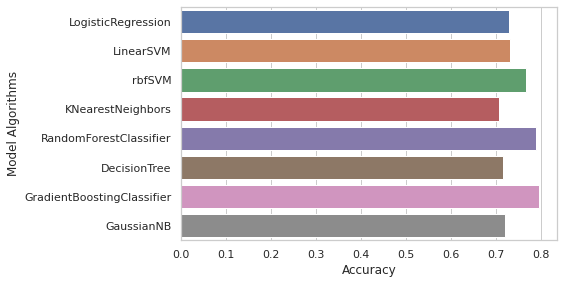

In [ ]:
sns.barplot(y='Model Algorithms', x='Accuracy', data=acc_df)



#### 2. Model Hyperparameter Tuning

1. Tuning Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)

param_grid = {'learning_rate':[0.01,0.001], 'max_depth' : [8,9,10]}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 5,n_jobs = 1)
CV_gbc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.001],
                         'max_depth': [8, 9, 10]})

In [ ]:
CV_gbc.best_params_

{'learning_rate': 0.01, 'max_depth': 8}

In [ ]:
tuned_gbc = GradientBoostingClassifier(learning_rate= 0.01,
                                       max_depth= 8)

In [ ]:
tuned_gbc.fit(X_train,y_train)
y_pred = tuned_gbc.predict(X_test)

print("Accuracy after optimization :",accuracy_score(y_test, y_pred))

Accuracy after optimization : 0.7828362114076399


#### Evaluation metrics

1. Confusion Matrix

[[4674 1064]
 [ 596 1310]]


Text(5.300000000000001, 0.5, 'Truth')

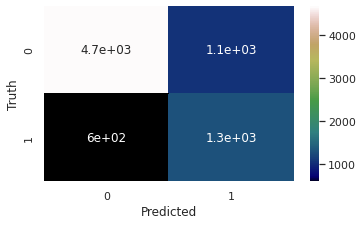

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, cmap = 'gist_earth')
plt.xlabel('Predicted')
plt.ylabel('Truth')

2. Classification Report 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      5738
         1.0       0.55      0.69      0.61      1906

    accuracy                           0.78      7644
   macro avg       0.72      0.75      0.73      7644
weighted avg       0.80      0.78      0.79      7644



3. ROC curve 

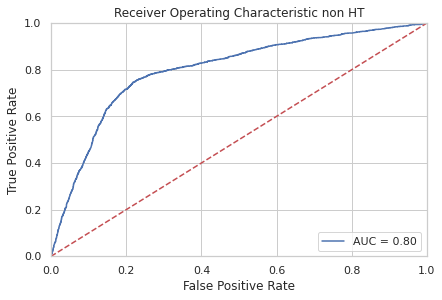

In [ ]:
gbc.fit(X_train,y_train)
probs = gbc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic non HT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

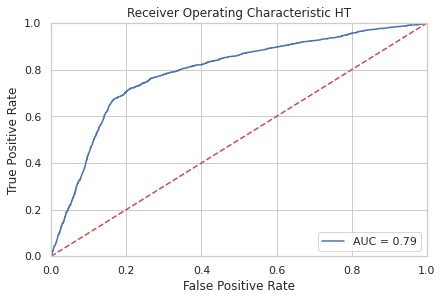

In [ ]:
tuned_gbc.fit(X_train,y_train)
probs = tuned_gbc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic HT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

2. Tuning Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

param_grid = {
    'max_depth': [100, 110],
    'max_features': ['auto','sqrt']
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs = 1)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [100, 110],
                         'max_features': ['auto', 'sqrt']})

In [ ]:
CV_rfc.best_params_

{'max_depth': 100, 'max_features': 'sqrt'}

In [ ]:
tuned_clf = RandomForestClassifier(criterion= 'gini', 
                                   max_depth= 100, 
                                   max_features= 'sqrt',
                                   random_state=0)

In [ ]:
tuned_clf.fit(X_train,y_train)
y_pred = tuned_clf.predict(X_test)

print("Accuracy after optimization :",accuracy_score(y_test, y_pred))

Accuracy after optimization : 0.7864992150706437


#### Evaluation metrics

1. Confusion Matrix

[[5033  705]
 [ 927  979]]


Text(5.300000000000001, 0.5, 'Truth')

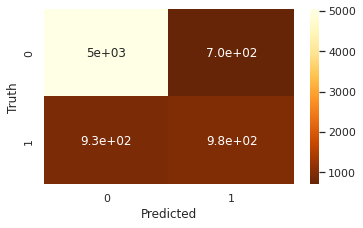

In [ ]:
# confusion matrix
com = confusion_matrix(y_test, y_pred)
print(com)

plt.figure(figsize = (5,3))
sns.heatmap(com, annot=True, cmap = 'YlOrBr_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

2. Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      5738
         1.0       0.58      0.51      0.55      1906

    accuracy                           0.79      7644
   macro avg       0.71      0.70      0.70      7644
weighted avg       0.78      0.79      0.78      7644



3. ROC Curve

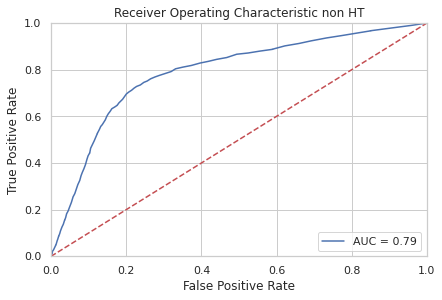

In [ ]:
rfc.fit(X_train,y_train)
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic non HT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

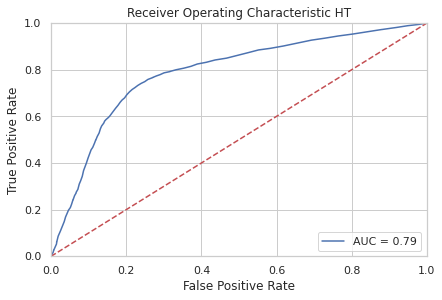

In [ ]:
tuned_clf.fit(X_train,y_train)
probs = tuned_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic HT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 3. Hyperparameter Tuning Result

Dari kedua model yang di hyperparameter tuning di atas, didapatkan hasil :


In [ ]:
a = {'Model Algorithms' : ['RandomForest', 
                           'RandomForet_ht', 
                           'GradientBoosting',
                           'GradientBoosting_ht'],
     'Accuracy': [0.786238, 0.786499215, 0.795133, 0.782443746]
     }

In [ ]:
df_ht=pd.DataFrame(a)
df_ht

,Model Algorithms,Accuracy
0,RandomForest,0.786238
1,RandomForet_ht,0.786499
2,GradientBoosting,0.795133
3,GradientBoosting_ht,0.782444


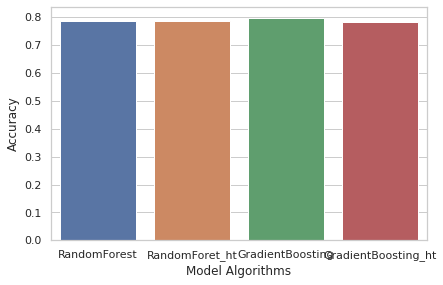

In [ ]:
sns.barplot(x='Model Algorithms', y='Accuracy', data=df_ht)

Didapatkan :
* Model Algorithm dengan accuracy tertinggi adalah Gradient Boosting
* Penurunan accuracy terjadi setelah dilakukan hyperparameter tuning

Selanjutnya, kita akan melihat Feature Importance dari GradientBoosting.

#### 4. Feature Importances

Text(0.5, 0, 'Gradient Boosting Feature Importance')

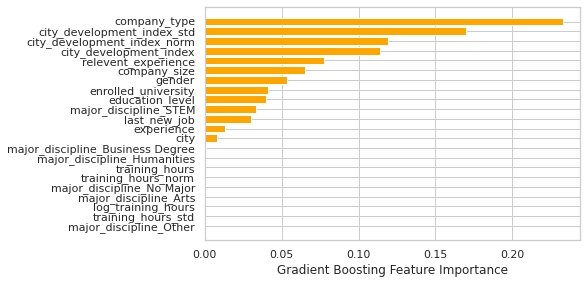

In [ ]:
sorted_idx = gbc.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], gbc.feature_importances_[sorted_idx],color = 'orange')
plt.xlabel("Gradient Boosting Feature Importance")

Dari grafik di atas, akan dilakukan feature selection dengan mengurangi feature :
1. 'training_hours_norm'
2. 'training_hours_std'
3. 'major_discipline_No Major'

Lalu akan dilakukan modeling dari awal kembali untuk mengecek hasil dari Gradient Boosting dan feature selection.

#### 5. Feature Selection and Remodelling 

In [ ]:
final_df.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours', 'target',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'log_training_hours',
       'city_development_index_std', 'training_hours_std',
       'city_development_index_norm', 'training_hours_norm'],
      dtype='object')

In [ ]:
# drop feature
Xf = final_df.drop(['training_hours_norm','training_hours_std','major_discipline_No Major','target'], axis=1)

yf = final_df['target']

display(Xf.shape)
display(yf.shape)

(19109, 19)

(19109,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test = train_test_split(Xf,yf,test_size=0.4,random_state=42,shuffle=True, stratify=yf)
print("X TRAIN SHAPE: ",x_train.shape)
print("X TEST SHAPE: ",X_test.shape)
print("Y TRAIN SHAPE: ",y_train.shape)
print("Y TEST SHAPE: ",y_test.shape)

print("TRAIN:",x_train.index, "\nTEST:",X_test.index)

from imblearn.over_sampling import SVMSMOTE
svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_train, y_train = svm_smote.fit_resample(x_train,y_train)

print('After SMOTE')
print("X TRAIN SHAPE: ",X_train.shape)
print("X TEST SHAPE: ",X_test.shape)
print("Y TRAIN SHAPE: ",y_train.shape)
print("Y TEST SHAPE: ",y_test.shape)

X TRAIN SHAPE:  (11465, 19)
X TEST SHAPE:  (7644, 19)
Y TRAIN SHAPE:  (11465,)
Y TEST SHAPE:  (7644,)
TRAIN: Int64Index([ 9078,  8139, 17490,  9335, 13500,  4734,  1426, 16660, 16116,
            14023,
            ...
             4377,  5698, 10375,  5654,  1037,  4743, 13444,  2385,  1553,
            14079],
           dtype='int64', length=11465) 
TEST: Int64Index([11320, 12865, 17872,   759, 11444,  3495,  9297,  5719,  8239,
            17845,
            ...
            11596, 11729, 12395, 14463,  7931, 15616,  6947, 18923, 11202,
            14646],
           dtype='int64', length=7644)
After SMOTE
X TRAIN SHAPE:  (17212, 19)
X TEST SHAPE:  (7644, 19)
Y TRAIN SHAPE:  (17212,)
Y TEST SHAPE:  (7644,)


In [ ]:
# standardscaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# modelling
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.7965724751439037


Dari hasil remodelling di atas, didapatkan accuracy final sebesar 0.796572475. Hasil ini meningkat dari hasil Gradient Boosting sebelumnya yaitu sebesar 0.795133. (meningkat 0.14%)


In [ ]:
# x_train['index1'] = x_train.index
# X_test['index1'] = X_test.index
# x_train.to_csv('/content/gdrive/MyDrive/J.A.R.V.I.S/Colab and Dataset/x_train.csv')
# X_test.to_csv('/content/gdrive/MyDrive/J.A.R.V.I.S/Colab and Dataset/x_test.csv')